# Real time single channel speech enhancement for low resource devices

As part of a contract work I did for a client, I developed single channel speech enhancement algorithms for real time processing in devices with limited computational resources. In doing so I utilised latest advancements in the field of signal processing and speech enhancement research. The following examples demonstrate the performance of two algorithms in three different noise environments (metro, outdoor field, road traffic). Algorithm 2 performs more aggressive noise reduction than the algorithm 1. The dataset used is MS-SNSD [1], and can be found in [this](https://github.com/microsoft/MS-SNSD) github repository.

A couple of details:
* 16 kHz sampling frequency
* 5dB Signal to Noise Ratio (SNR)

---
[1] C. Reddy et al. "A scalable noisy speech dataset and online subjective test framework", *INTERSPEECH*, pp. 1816 - 1820, 2019.

In [1]:
import IPython.display as ipd
from librosa import core
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def play_audio_samples(noise_type, fs=16000):
    cleansp, _ = core.load(f'./audio/clean_speech_{noise_type}.wav', sr=fs, mono=True, duration=10.0)
    noisysp, _ = core.load(f'./audio/noisy_{noise_type}.wav', sr=fs, mono=True, duration=10.0)
    enhanced1, _ = core.load(f'./audio/enhanced_{noise_type}_1.wav', sr=fs, mono=True, duration=10.0)
    enhanced2, _ = core.load(f'./audio/enhanced_{noise_type}_2.wav', sr=fs, mono=True, duration=10.0)
    print('Clean speech:')
    ipd.display(ipd.Audio(data=cleansp, rate=fs))
    print('Noisy speech:')
    ipd.display(ipd.Audio(data=noisysp, rate=fs))
    print('Enhanced speech (algorithm 1):')
    ipd.display(ipd.Audio(data=enhanced1, rate=fs))
    print('Enhanced speech (algorithm 2):')
    ipd.display(ipd.Audio(data=enhanced2, rate=fs))
    return cleansp, noisysp, enhanced1, enhanced2

def plot_spectrograms(signals, labels, fs=16000):
    stft_options = dict(n_fft=512, window='hann', win_length=512, hop_length=512//4)
    fig = plt.figure(figsize=(14, 10))
    for i, sig in enumerate(signals):
        x = librosa.amplitude_to_db(abs(librosa.stft(sig, **stft_options)))
        ax = fig.add_subplot(2, 2, i+1)
        librosa.display.specshow(x, sr=fs, x_axis='time', y_axis='hz', ax=ax)
        ax.set_title(labels[i])
    plt.show()

### Example: Metro

In [3]:
cleansp, noisysp, enhanced1, enhanced2 = play_audio_samples(noise_type='metro')

Clean speech:


Noisy speech:


Enhanced speech (algorithm 1):


Enhanced speech (algorithm 2):


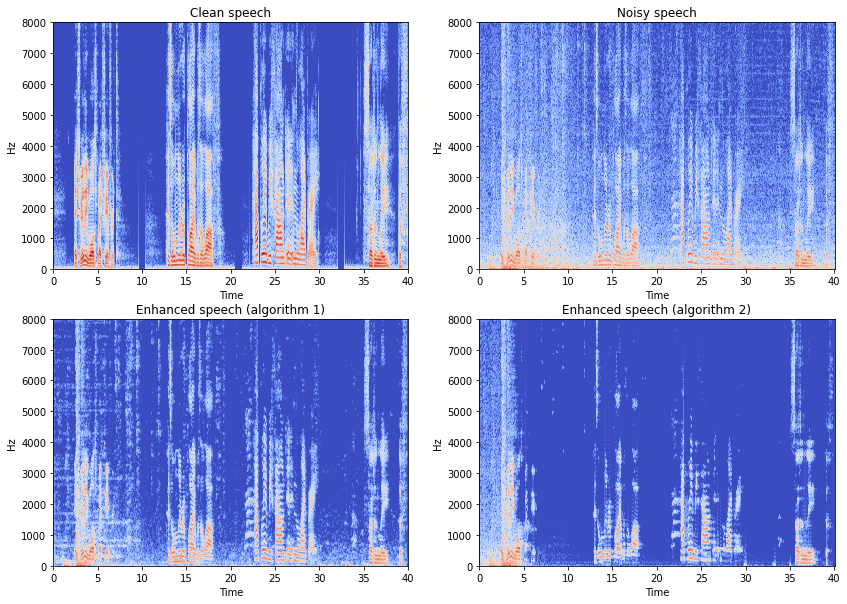

In [4]:
plot_spectrograms(signals=[cleansp, noisysp, enhanced1, enhanced2],
                  labels=['Clean speech', 'Noisy speech',
                          'Enhanced speech (algorithm 1)', 'Enhanced speech (algorithm 2)'])


The algorithm with the more aggressive noise reduction introduces some subtle "crackle" noises during speech but the noise during non-speech regions is greatly reduced.

### Example: Field

In [5]:
cleansp, noisysp, enhanced1, enhanced2 = play_audio_samples(noise_type='field')

Clean speech:


Noisy speech:


Enhanced speech (algorithm 1):


Enhanced speech (algorithm 2):


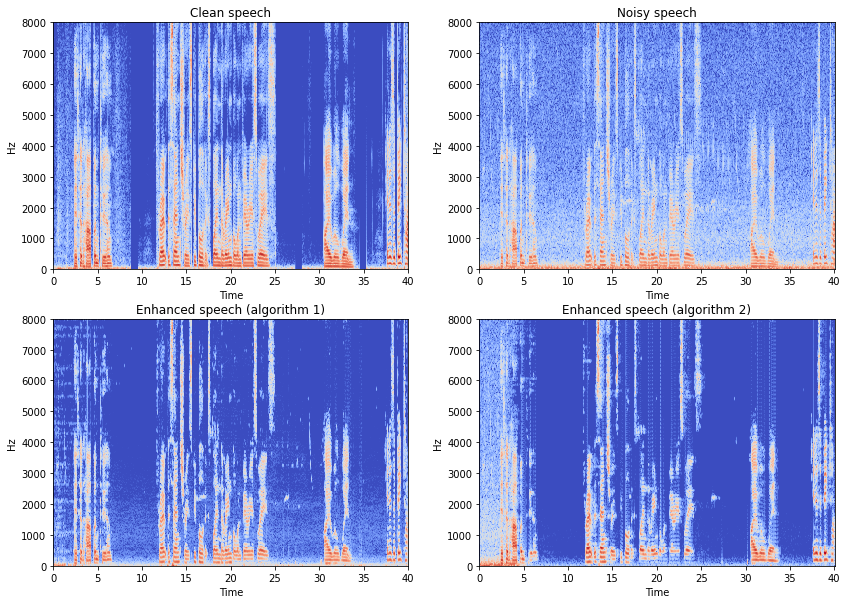

In [6]:
plot_spectrograms(signals=[cleansp, noisysp, enhanced1, enhanced2],
                  labels=['Clean speech', 'Noisy speech',
                          'Enhanced speech (algorithm 1)', 'Enhanced speech (algorithm 2)'])


### An example of a more challenging case: Traffic noise

In [7]:
cleansp, noisysp, enhanced1, enhanced2 = play_audio_samples(noise_type='traffic')

Clean speech:


Noisy speech:


Enhanced speech (algorithm 1):


Enhanced speech (algorithm 2):


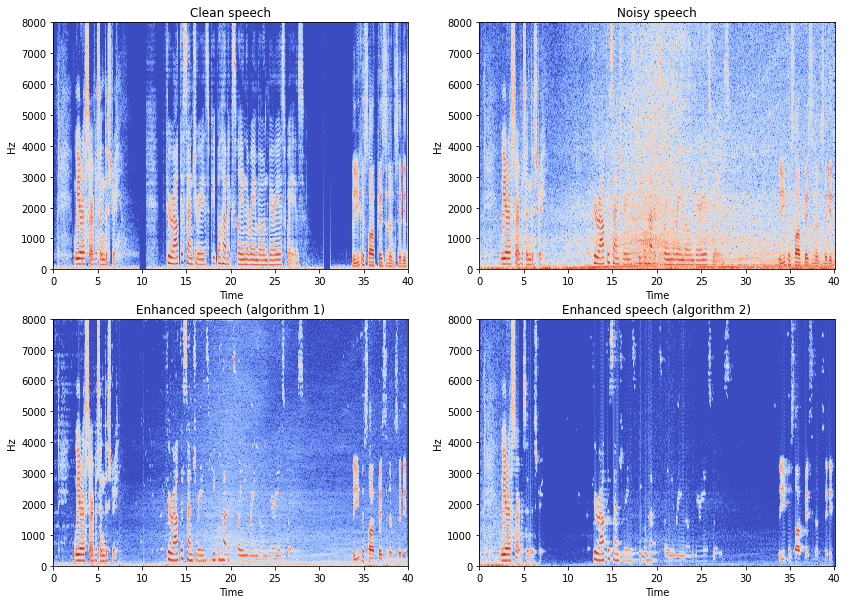

In [8]:
plot_spectrograms(signals=[cleansp, noisysp, enhanced1, enhanced2],
                  labels=['Clean speech', 'Noisy speech',
                          'Enhanced speech (algorithm 1)', 'Enhanced speech (algorithm 2)'])


The more aggressive noise reduction of algorithm 2 affects some parts of the speech but the speech is nevertheless intelligible.